 # Kitaev Webb Algorithm for Gaussians

In [2]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import RYGate



## Functions

In [8]:
#define f for small and large sigma

def f_small(sigma, mu,n):
    return np.sum(np.exp((-(np.arange(-n,n+1, 1) - mu)**2)/float(sigma**2)))

#def f_large(sigma,mu,N):
    #return np.sum(np.exp((-(np.arange(-N, N+1, 1) - mu)**2)/sigma**2))

def alpha_2pi(sigma, mu,n):
    return (np.arccos(np.sqrt(f_small(sigma/2., mu/2.,n)/f_small(sigma, mu,n)))/(2*np.pi))
           
    
def fraction_to_binary(fraction, num_bits): #this codes a number between 0 and 1 as Kitaev describes (page 3, paragraph before the section gaussian in multiple dimensions)
    binary_rep = []

    for _ in range(num_bits):
        fraction *= 2
        #print(fraction)
        bit = int(fraction)
        binary_rep.append(bit)
        fraction -= bit

    return binary_rep




print(f_small(0.5,0,2))
print(alpha_2pi(5,0,4))
print(fraction_to_binary(0.625, 5))

1.036631502847818
0.10570528431321867
[1, 0, 1, 0, 0]


# Circuit

In [21]:
N=3#number of suplementary qubits/2
n=2 #number of main qubits

sigma_0=1
mu_0=0.5

mu_0_2=4


circuit = QuantumCircuit(2*N+n,n)

#
for k in range(n): 
        circuit.barrier()
        binary_fraction_1=fraction_to_binary(alpha_2pi(sigma_0,mu_0,n),N)
        binary_fraction_2=fraction_to_binary(alpha_2pi(sigma_0,mu_0_2,n),N)
        
# Initialize Supplementary Qubits.
        counter=0
        for i in binary_fraction_1:
            if i== 1:
                    circuit.x(counter)

            counter+=1
        
        counter_2=0
        for l in binary_fraction_2: 
            if l== 1:
                    circuit.x(counter_2+N)

            counter_2+=1

    #apply rotation 
        for m in range(len(binary_fraction_2)):
            if k==0:
                break
            else:
            #the following is a double controlled ry rotation,if q_(k-1) =1 the angle for mu-1 will be called, if 0 no rotation
                ry = RYGate(2*np.pi/2**(m-1)).control(2,label=None)
                ccry = RYGate(2*np.pi/2**(m-1)).control(2,label=None)
                circuit.append(ccry,[m+N,2*N+k-1,2*N+k])
                break
        
         
        
        circuit.x(2*N+k-1) 
        for j in range(len(binary_fraction_1)):
            if k==0:
                circuit.cry(2*np.pi/2**(j-1),j,2*N+k)
            
            else:
            #we applied x gate inbetween two for loops, so if q_1 is 0 initially the rotation for the angle mu will be called
                ry = RYGate(2*np.pi/2**(j)).control(2,label=None)
                ccry = RYGate(2*np.pi/2**(j)).control(2,label=None)
                circuit.append(ccry,[j,2*N+k-1,2*N+k])  
                
        circuit.x(2*N+k-1)
        
        


    #reset the supplementary qubits
        counter_3=0
        for a in binary_fraction_1:
            if a== 1:
                    circuit.x(counter_3)

            counter_3+=1
        
        counter_4=0
        for b in binary_fraction_2:
            if b== 1:
                    circuit.x(counter_4+N)

            counter_4+=1
            
        #update the parameters
        print(binary_fraction_1)
        print(binary_fraction_2)
        print(sigma_0)
        print(mu_0)
        print(mu_0_2)
        sigma_0=sigma_0/2.0
        mu_0=(mu_0)/2.0
        mu_0_2=(mu_0-1)/2.0
        


circuit.measure(np.arange(2*N,2*N+n,1),np.arange(0,n,1))
    
        
        

circuit.draw("mpl",justify="none")





/var/folders/dk/2y17dwn916n0849gyw2c2q3c0000gn/T/ipykernel_6125/3637811680.py:10: RuntimeWarning: invalid value encountered in arccos
  return (np.arccos(np.sqrt(f_small(sigma/2., mu/2.,n)/f_small(sigma, mu,n)))/(2*np.pi))


ValueError: cannot convert float NaN to integer

## Executing the Simulation

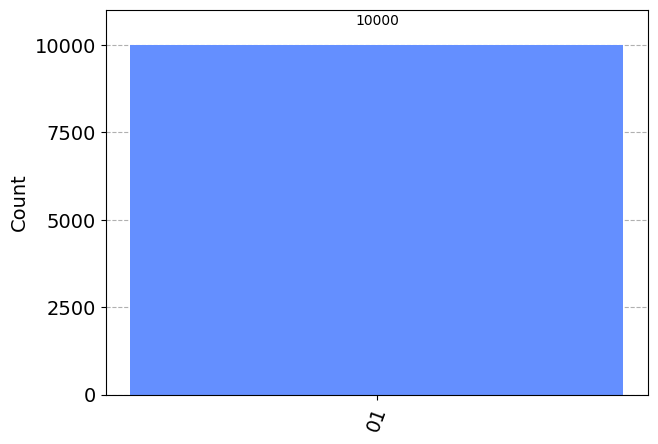

In [13]:
# Simulation part

backend = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)#
plot_histogram(counts)

In [10]:
float_to_binary(1.

NameError: name 'float_to_binary' is not defined

In [35]:
numbers_list

['1001']

In [36]:
type(binary_fraction)

str

In [29]:
range(2)

range(0, 2)

In [30]:
print(range(2))

range(0, 2)


In [6]:
np.arange(2)

array([0, 1])

In [7]:
list(range(2))

[0, 1]